In [1]:
import numpy as np
import pandas as pd
import sqlite3 as sql
import datetime as dt
import base64
from datetime import date
from IPython import display
from base64 import b64decode
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
%matplotlib inline

In [2]:
# Connect to the database

conn = sql.connect("BabyDaybook_20221104.db")
cursor = conn.cursor()

In [4]:
# Explore the database and its tables (optional)

sql_query1 = """SELECT name FROM sqlite_master 
    WHERE type='table';"""
#cursor.execute(sql_query1)

print("Tables in database\n")
tables=cursor.execute(sql_query1).fetchall()
print(tables)

tableOfInterest =''.join(tables[0]) #converts tuple to string
print("Table of Interest:",tableOfInterest)

#sql_query2 = "SELECT * FROM daily_actions"
sql_query2 ="SELECT * FROM "+ tableOfInterest;

print("\nParameters in table:\n")
data=cursor.execute(sql_query2)
for column in data.description:
    print(column[0])
    
#sql_query3 = "SELECT * FROM "+ tableOfInterest;
sql_query3 = "SELECT type, start_millis, end_millis, duration, pee, poo, volume, notes FROM daily_actions"
#sql_query4 = "SELECT start_millis, end_millis, duration FROM daily_actions WHERE type = 'sleeping' "

#data=cursor.execute(sql_query3)#.fetchall() #fetchone()
#for row in data:
    #print(row)

Tables in database

[('babies',), ('da_types',), ('daily_actions',), ('groups',), ('growth',), ('moments',), ('daily_notes',), ('reminders',)]
Table of Interest: babies

Parameters in table:

uid
svt
updated_millis
user_uid
name
gender
birthday
is_premature
expected_birthday
ui_color
da_types_config
photo_base64
convert_units


In [6]:
# More database exploration, but much simpler way to just import sql into pandas!!

babyInfo=pd.read_sql(sql_query2, conn)
print(babyInfo.columns)

babyName=babyInfo['name'][0]
babydob=babyInfo['birthday'][0]
print('Stored DOB:',babydob)
babydob=pd.to_datetime(babydob,unit='ms')
print('Converted DOB:',babydob)

babyPic=babyInfo['photo_base64'][0]
print('Picture data type:', type(babyPic))

with open("babyPic.png", "wb") as fh:
  fh.write(base64.urlsafe_b64decode(babyPic))

#display.Image(b64decode(babyPic))

Index(['uid', 'svt', 'updated_millis', 'user_uid', 'name', 'gender',
       'birthday', 'is_premature', 'expected_birthday', 'ui_color',
       'da_types_config', 'photo_base64', 'convert_units'],
      dtype='object')
Stored DOB: 1643097600000
Converted DOB: 2022-01-25 08:00:00
Picture data type: <class 'str'>


## Good practice for another time: put the corrected DOB datetime back into the database

In [6]:
# Let's get into the data of intersest (Sleep/Diaper/Feeding logs)

sql_query3 = "SELECT * FROM daily_actions"
Babydata=pd.read_sql(sql_query3, conn) # Dataframe object
type_counts = Babydata['type'].value_counts()

print('Size of Babydata:', Babydata.shape)
print('\nColumns of Babydata:\n', Babydata.columns)
print('\nTypes of logs:\n',Babydata['type'].unique())
print('\nEvent counts:\n')
print(type_counts)

Size of Babydata: (6873, 24)

Columns of Babydata:
 Index(['uid', 'svt', 'updated_millis', 'user_uid', 'baby_uid', 'type',
       'start_millis', 'notes', 'group_uid', 'end_millis', 'pause_millis',
       'duration', 'left_duration', 'right_duration', 'in_progress', 'side',
       'pee', 'poo', 'hair_wash', 'temperature', 'volume', 'amount',
       'amount_unit', 'reaction'],
      dtype='object')

Types of logs:
 ['sleeping' 'pump' 'bottle' 'diaper_change' 'breastfeeding' 'tummy_time'
 'bath' 'medicine' 'alvukaFFSWXJHCBIIPKDUBECBMGP3512' 'symptom'
 'mxmVKLAOWKFYCUKVVYDS028521473055' 'playtime' 'walking_outside' 'crying'
 'P4383824042888488153776645035805' 'vaccination' 'doctor_visit' 'other'
 'food' 'temperature']

Event counts:

breastfeeding                       2126
sleeping                            1783
diaper_change                       1639
bottle                               627
pump                                 365
medicine                             135
walking_outsi

In [650]:
#Trying to make sense of the random string "types": they appear to be deleted entries

filter_odd = Babydata['type'].str.contains('P4383824042888488153776645035805')
#filter_odd = Babydata['type'].str.contains('mxmVKLAOWKFYCUKVVYDS028521473055')
#filter_odd = Babydata['type'].str.contains('alvukaFFSWXJHCBIIPKDUBECBMGP3512')
Odddata=Babydata[filter_odd]
Odddata['datetime']=pd.to_datetime(Odddata['start_millis'],unit='ms')-pd.Timedelta(8,'h') 
Odddata.tail()

/Users/eperalta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,uid,svt,updated_millis,user_uid,baby_uid,type,start_millis,notes,group_uid,end_millis,...,side,pee,poo,hair_wash,temperature,volume,amount,amount_unit,reaction,datetime
3273,reuhepPPWBJJRGQ63806565618054524,1653119723775,1653119723707,QhM3MWp0hGce14EmxJS6AGMhXXc2,cupvcoreyfJ805612865827782265057,P4383824042888488153776645035805,1653093300000,,,1653094200000,...,,0,0,0,0.0,0.0,0.0,,,2022-05-20 16:35:00.000
3314,rgajivNJUYG138088532362771746711,1653256845484,1653256845261,QhM3MWp0hGce14EmxJS6AGMhXXc2,cupvcoreyfJ805612865827782265057,P4383824042888488153776645035805,1653241800000,To Los Gatos,,1653242940000,...,,0,0,0,0.0,0.0,0.0,,,2022-05-22 09:50:00.000
3316,hupmgabduoietstwtRHUNKCQUQR28036,1653256837015,1653256818539,QhM3MWp0hGce14EmxJS6AGMhXXc2,cupvcoreyfJ805612865827782265057,P4383824042888488153776645035805,1653255439616,,,1653256818539,...,,0,0,0,0.0,0.0,0.0,,,2022-05-22 13:37:19.616
3462,yI325432620004764865631550587773,1653766661344,1653766661224,QhM3MWp0hGce14EmxJS6AGMhXXc2,cupvcoreyfJ805612865827782265057,P4383824042888488153776645035805,1653761880000,,,1653766200000,...,,0,0,0,0.0,0.0,0.0,,,2022-05-28 10:18:00.000
3470,cbdpxnKQUIDCSULJIY65131638786286,1653788816061,1653788812494,MHirw8PAYtW9yiCNgU8vG3Y2veC2,cupvcoreyfJ805612865827782265057,P4383824042888488153776645035805,1653783240000,,,1653788812494,...,,0,0,0,0.0,0.0,0.0,,,2022-05-28 16:14:00.000


In [7]:
# Create a new parameter in datetime format for easier understanding vs milliseconds, & convert from UTC time

Babydata['datetime']=pd.to_datetime(Babydata['start_millis'],unit='ms')-pd.Timedelta(8,'h') 

# Clean up some of the columns not of interest
#del Babydata['uid'], Babydata['svt'], Babydata['updated_millis'], Babydata['user_uid'], Babydata['baby_uid']
#del Babydata['group_uid'],Babydata['temperature'], Babydata['in_progress']

print(Babydata.index)

# Extract only the sleep logs

filter_sleep = Babydata['type'].str.contains('sleeping')
Sleepdata=Babydata[filter_sleep][['datetime','duration']]

print(Sleepdata.index)

# Reorder and clean up indices (the indices inherited are from the original larger database -with more types)

Sleepdata=Sleepdata.sort_values(by=['datetime']);
Sleepdata.index=np.arange(len(Sleepdata['datetime']))

#Sleepdata=Sleepdata.sort_values(by=['datetime_tz']);
#Sleepdata.index=np.arange(len(Sleepdata['datetime_tz']))

Babydata.head()
Sleepdata.tail()

RangeIndex(start=0, stop=6873, step=1)
Int64Index([   0,    4,   10,   13,   16,   19,   23,   28,   31,   34,
            ...
            6834, 6839, 6845, 6849, 6851, 6856, 6859, 6864, 6869, 6872],
           dtype='int64', length=1783)


,datetime,duration
1778,2022-11-03 18:16:00.000,34470051
1779,2022-11-04 04:10:00.000,6720000
1780,2022-11-04 09:13:07.307,5396124
1781,2022-11-04 14:47:46.711,2983696
1782,2022-11-04 19:17:00.000,0


In [9]:
# Create daily activity vectors from timestamp data

startDate=dt.date(2022,1,29) #Nominal: 1/29
endDate=dt.date(2022,11,4)
#startDate=endDate-pd.Timedelta(3,'m')
#endDate=date.today()
res=5; # time Vector resolution = 5min

numdays=pd.Timedelta(endDate-startDate).days+1

print('Start date:', startDate)
print('End date:',endDate)
print('\nNumber of days parsed, inclusive:',numdays)

daylightDatetime=dt.datetime(2022,3,13,2)

dateperiodFilter=Sleepdata['datetime']>=pd.Timestamp(startDate)

startIndex=np.where(dateperiodFilter)[0][0]; # Find the first element where data date >= starte date

dateperiodFilter=Sleepdata['datetime']>=pd.Timestamp(endDate+pd.Timedelta(1,'d'))
#dateperiodFilter=Sleepdata['datetime_tz']>=pd.Timestamp(endDate+pd.Timedelta(1,'d')).replace(tzinfo=timezone.utc)

#endIndex=np.where(dateperiodFilter)[0][0]; 
#endIndex0=np.where(dateperiodFilter)[0][0]; 
endIndex=np.where(dateperiodFilter)[0][-1]+1; # +1 to include the last element


k=0;

dailySleepP=np.zeros((numdays+1,int(24*60/res)))
indexMax=dailySleepP.shape[1]
vectorDate=startDate;

if startIndex==0:
    startIndex=1;
    
# Loop to vectorize day from list of timestamped events
for i in range(startIndex-1,endIndex):
    
    if Sleepdata['datetime'][i]>daylightDatetime: # If daylight savings, correct timestamp
        date=(Sleepdata['datetime'][i]+pd.Timedelta(1,'h')).date();
        daytime=Sleepdata['datetime'][i]+pd.Timedelta(1,'h')-dt.datetime.combine(date, dt.time(0,0));
    else:
        date=Sleepdata['datetime'][i].date();
        daytime=Sleepdata['datetime'][i]-dt.datetime.combine(date, dt.time(0,0));
    
    minutes=int(daytime.total_seconds()/60);
    index=int(minutes/res);
    duration=int(Sleepdata['duration'][i]/1000/60/res);
    
    if date>vectorDate: # Build the next vector if all day's timestamps completed
        k+=(date-vectorDate).days;
        vectorDate=vectorDate+pd.Timedelta(1,'d');
        #print(date)

    if index+duration>=indexMax:
        firsthalf=indexMax-index;
        secondhalf=duration-firsthalf;
        
        #if i==startIndex-1:
        if i==startIndex-1 and vectorDate>dt.date(2022,1,25): # Reach back, unless Birthday (need to generalize)
            dailySleepP[k,0:secondhalf]=np.ones(secondhalf)
        else:
            dailySleepP[k,index:]=np.ones(firsthalf);
            if k<numdays:
                dailySleepP[k+1,0:secondhalf]=np.ones(secondhalf)
    else:
        if k<=numdays:
            dailySleepP[k,index:index+duration]=np.ones(duration)
            #if i>=endIndex0:    #debug
            #    print(i, k, date, daytime, duration)
            
print('Number day entries in activity vector:',len(dailySleepP))

Start date: 2022-01-29
End date: 2022-11-04

Number of days parsed, inclusive: 280


IndexError: index -1 is out of bounds for axis 0 with size 0

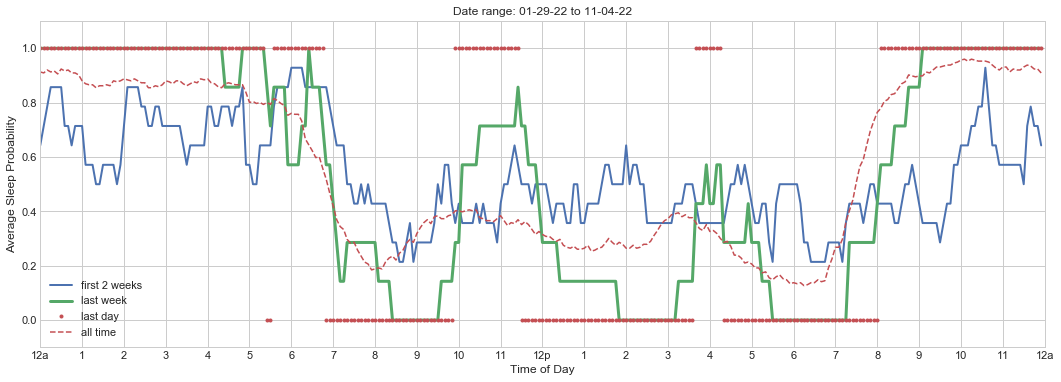

In [11]:
# Plot average daily vectors to look for patterns

fig, ax = plt.subplots(figsize=(18,6))
#plt.figure(figsize=(18,6))

plt.style.use('seaborn-whitegrid')
#ax.style.use('seaborn-whitegrid')

#plotDate=datetime.date(2022,3,14)
#dayNum=pd.Timedelta(plotDate-startDate).days

# excluding the last row of dailySleepP below as it is meant to be incomplete (only for night)

curve1, = ax.plot(dailySleepP[0:14,].mean(axis=0),'b', label='first 2 weeks', linewidth=2)

     
#biweekly=np.arange(0,numdays-14,int(numdays/14)); # Need an error catch for shorter analysis ranges
#i=biweekly[12] 
#curve3, = ax.plot(dailySleepP[i:i+14,].mean(axis=0),'g', label='last 2 weeks', linewidth=3)

#curve4, = ax.plot(dailySleepP[-15:-1,].mean(axis=0),'g--',label='last 2 weeks', linewidth=3)
curve5, = ax.plot(dailySleepP[-8:-1,].mean(axis=0),'g',label='last week', linewidth=3)

curve6, = ax.plot(dailySleepP[-2,],'r.',label='last day')

curve7, = ax.plot(dailySleepP[:-1,].mean(axis=0),'r--',label='all time')


ax.legend(handles=[curve1, curve5, curve6,curve7])

plt.xlabel('Time of Day')
plt.ylabel('Average Sleep Probability')

timeticks=np.arange(0, indexMax+1, step=int(indexMax/24));
timelabels=['12a','1','2','3','4','5','6','7','8','9','10','11','12p','1','2','3','4','5','6','7','8','9','10','11','12a']
plt.xticks(timeticks,timelabels);  # Set label locations.
plt.axis([0, indexMax,-.1,1.1]);

#plotDate=startDate+pd.Timedelta(dayNum,'d')
plt.title('Date range: '+ startDate.strftime("%m-%d-%y")+ ' to ' + endDate.strftime("%m-%d-%y"));

Fig_name= 'Oliver_SleepDailyProb_'+ startDate.strftime("%m-%d-%y")+ '_to_' + endDate.strftime("%m-%d-%y");
fig.savefig(Fig_name)

from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

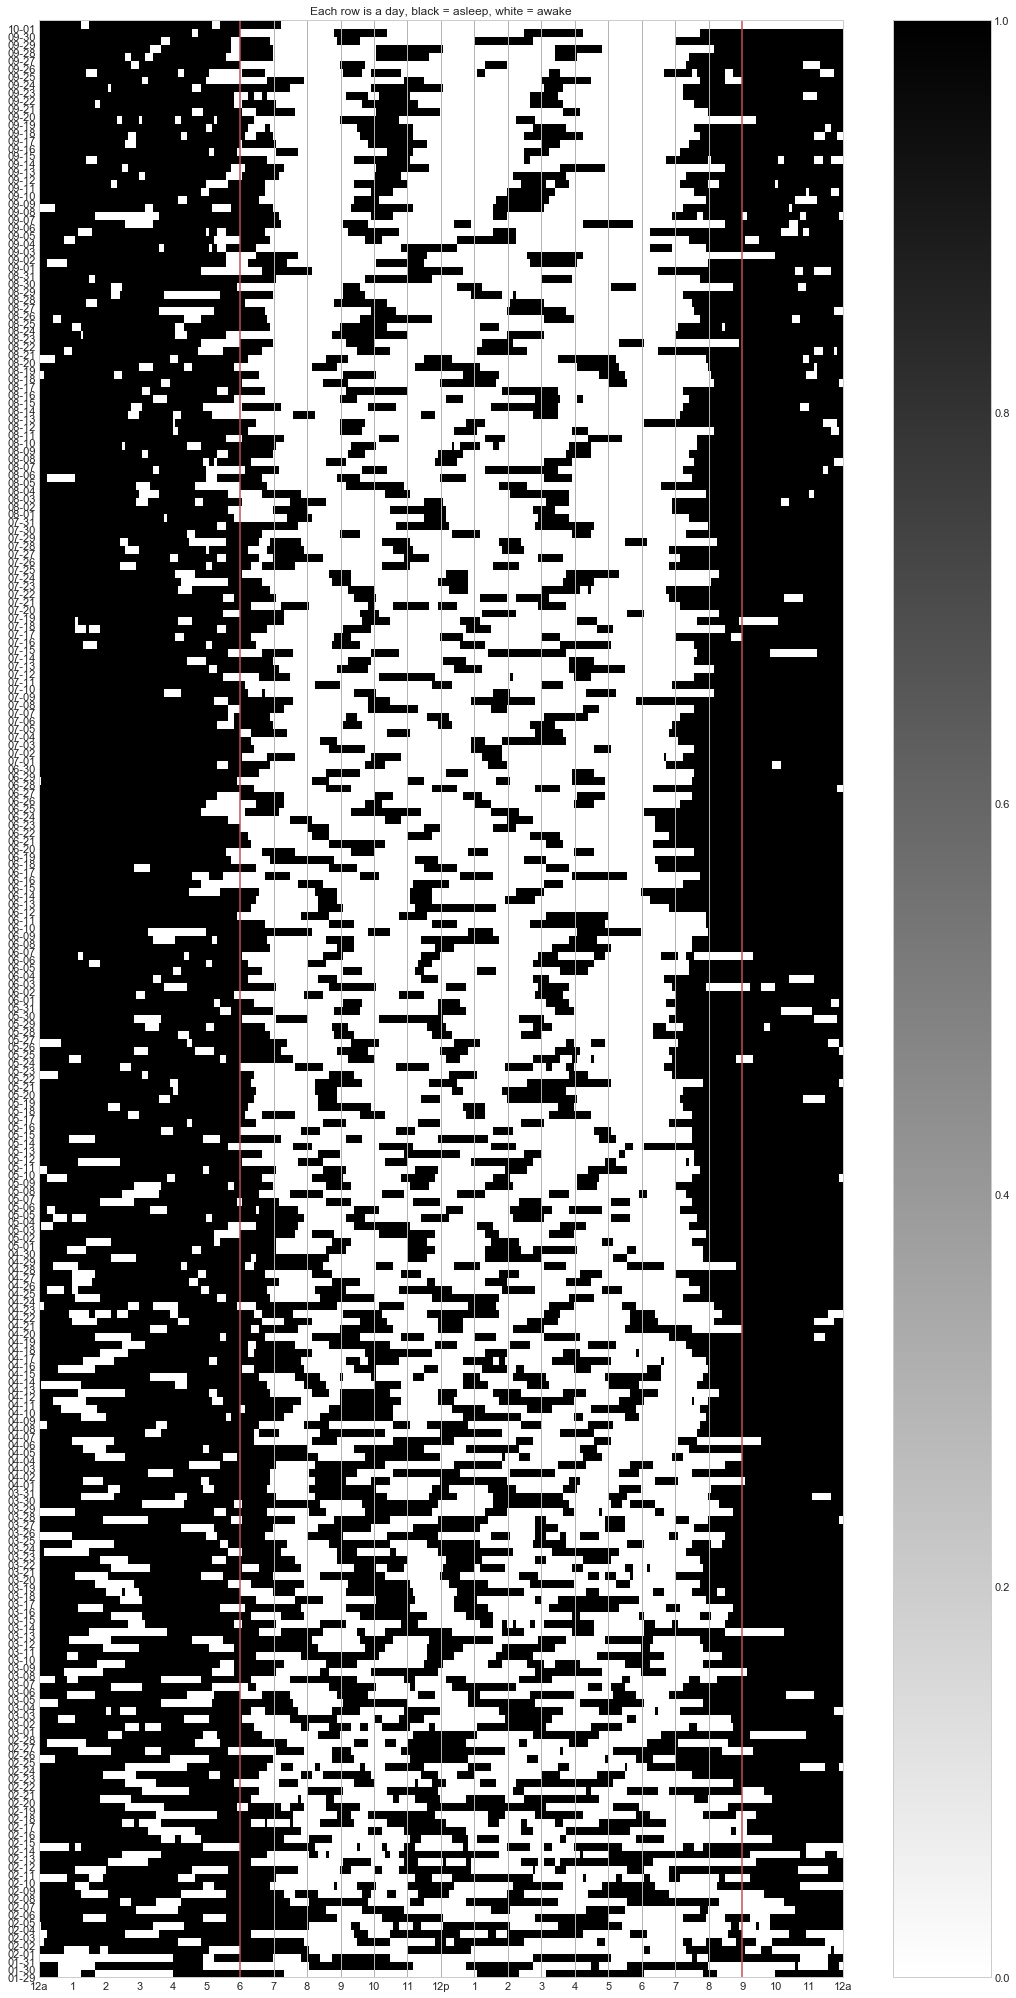

In [11]:
# Strip chart of all the daily activity vectors to look for patterns by eye

#fig, ax = plt.subplots(9,figsize=(18,35))

fig = plt.figure(figsize=(18,36))
#plt.pcolor(dailySleepP[:-1,],cmap='gray_r')
plt.pcolor(dailySleepP,cmap='gray_r')

babyAsleep=9; # pm - After this time he's generally asleep (Psleep > 80%)
babyAwake=6; # am - After this time he's generally waking (Psleep drops < 80%)

dailyDayind=int(indexMax/24*babyAwake); 
dailyNightind=int(indexMax/24*(babyAsleep+12)); 

plt.axvline(x = dailyDayind, color = 'r', label = '6 am')
plt.axvline(x = dailyNightind, color = 'r', label = '9 pm')

for h in range(0,14):
    lineind=int(indexMax/24*(7+h)); 
    plt.axvline(x = lineind, color='0.7', linewidth=1);
    
plt.xticks(timeticks,timelabels);
datelabels=pd.date_range(startDate, endDate+pd.Timedelta(1,'d')).strftime("%m-%d");
#datelabels=pd.date_range(startDate, endDate).strftime("%m-%d");
plt.yticks(np.arange(0, numdays+1),datelabels);
plt.colorbar();

plt.title('Each row is a day, black = asleep, white = awake');

Fig_name= 'Oliver_SleepMap_'+ startDate.strftime("%m-%d-%y")+ '_to_' + endDate.strftime("%m-%d-%y");
fig.savefig(Fig_name)

In [13]:
# Aggregate daily values 

SleepDaily=Sleepdata.groupby(by=Sleepdata['datetime'].dt.date).sum()/1000/60/60
Sleepbydaycounts=Sleepdata.groupby(by=Sleepdata['datetime'].dt.date).count()
SleepDaily['counts']=Sleepbydaycounts['datetime']
Sleepbydaymax=Sleepdata.groupby(by=Sleepdata['datetime'].dt.date).max()
SleepDaily['longest sleep']=Sleepbydaymax['duration']/1000/60/60 #format = '%m/%d/%Y'

skipDates1=(startDate-SleepDaily.index[0]).days
skipDates2=(SleepDaily.index[-1]-endDate).days

SleepDaily = SleepDaily.iloc[skipDates1-1:-skipDates2, :] # Remove the rows that were not of interest for analysis
#SleepDaily = SleepDaily.iloc[skipDates1-1:-skipDates2+1, :] # Remove the rows that were not of interest for analysis
SleepDaily['duration']=dailySleepP[:-1,:].sum(axis=1)*res/60

# Replaced these two count with better logic inside for loop
#SleepDaily['day naps v0']=(np.diff(dailySleepP[:-1,dailyDayind:dailyNightind])==1).sum(axis=1)-1 
#SleepDaily['night wakes v0']=(np.diff(dailySleepP[:-1,0:dailyDayind])==-1).sum(axis=1)+(np.diff(dailySleepP[:-1,dailyNightind:-1])==-1).sum(axis=1)

# Clean up the index
SleepDaily.index = pd.to_datetime(SleepDaily.index, format = '%Y/%m/%d').strftime('%m-%d')

LongestWake=[]
LongestWakeHour=[]
LongestSleepHour=[]
AverageDayNap=[]
AverageDayWake=[]
DayNapCount=[]
NightWakeCount=[] 
for i in range(0,len(SleepDaily)):  
    testS=format(dailySleepP[i,dailyDayind:-1].astype('int8')) #convert to string of integers (to use strip/split func)
    testS=testS[1:-1].replace(" ","").replace("\n","") #remove all formating in string
    
    #maxW=max(testS.strip('1').split('1')); #separate out all the wake periods (sleepP=0) and find max
    #maxS=max(testS.strip('0').split('0'))  #separate out all the sleep periods (sleepP=1) and find max
    
    wakes=testS.strip('1').split('1');
    wakes=[ele for ele in wakes if ele != ''];
    maxW=max(wakes); #separate out all the wake periods (sleepP=0) and find max
    
    LongestWake.append(len(maxW)*res/60);
    LongestWakeHour.append((testS.find(maxW)+dailyDayind)*res/60);
    
    dailyBedtimeMin=int(indexMax/24*(12+4)); 
    dailyBedtimeMax=int(indexMax/24*(12+11));
    testS=format(dailySleepP[i,dailyBedtimeMin:dailyBedtimeMax].astype('int8')) #convert to string of integers (to use strip/split func)
    testS=testS[1:-1].replace(" ","").replace("\n","") #remove all formating in string
    sleeps=testS.strip('0').split('0');
    sleeps=[ele for ele in sleeps if ele != ''];
    maxS=max(sleeps)  #separate out all the sleep periods (sleepP=1) and find max
    #if len(wakes[-1])<=6 and len(maxS)==len(sleeps[-1]):
        #print('maxS=', len(maxS))
        #print('last sleep=',len(sleeps[-1]))
     #   print(SleepDaily.index[i])
     #   print(testS.find(sleeps[-2]))
     #   if testS.find(sleeps[-2])>int(indexMax/24*17): 
     #       maxS=sleeps[-2];
            
        #print(testS.find(maxS))
    
    #LongestSleepHour.append((testS.find(maxS)+dailyDayind)*res/60);
    LongestSleepHour.append((testS.find(maxS)+dailyBedtimeMin)*res/60);
    #LongestSleepHour.append((testS.rfind(maxS)+dailyBedtimeMin)*res/60);
    
    # Bedtime logic still has some errors, 4/20 & 3/13 too early
    
    testS=format(dailySleepP[i,dailyDayind:dailyNightind].astype('int8')) #convert to string of integers (to use strip/split func)
    testS=testS[1:-1].replace(" ","").replace("\n","") #remove all formating in string
    if testS[0]=='0':
        testS=testS.lstrip('0')
    if testS[0]=='1':
        testS=testS.lstrip('1')
    if testS[-1]=='0':
        testS=testS.rstrip('0')
    if testS[-1]=='1':
        testS=testS.rstrip('1')
    dayNaps=testS.split('0');
    dayNaps = [ele for ele in dayNaps if ele != '']; # remove all the empty elements
    dayNapLengths = [len(ele) for ele in dayNaps]  
    dayWakes=testS.split('1');
    dayWakes = [ele for ele in dayWakes if ele != '']; # remove all the empty elements
    dayWakeLengths = [len(ele) for ele in dayWakes]
    dayWakeisnightWake=0;
    if dayWakeLengths[0]<=6:
        del dayWakeLengths[0]
        del dayNapLengths[0]
        dayWakeisnightWake=1;
    AverageDayNap.append(np.mean(dayNapLengths)*res/60); 
    AverageDayWake.append(np.mean(dayWakeLengths)*res/60);
    DayNapCount.append(len(dayNaps))
    testS=format(dailySleepP[i,dailyNightind:-1].astype('int8'))
    testS+=format(dailySleepP[i+1,0:dailyDayind].astype('int8'))
    testS=testS.replace(" ","").replace("\n","").replace("]","").replace("[","")  
    nightWakes=testS.split('1');
    nightWakes = [ele for ele in nightWakes if ele != ''];
    NightWakeCount.append(len(nightWakes)+dayWakeisnightWake)

SleepDaily['night wakes']=NightWakeCount;
SleepDaily['day naps']=DayNapCount;
SleepDaily['longest wake']=LongestWake;
SleepDaily['longest wake hour']=LongestWakeHour;
SleepDaily['longest sleep hour']=LongestSleepHour;
SleepDaily['average day nap']=AverageDayNap;
SleepDaily['average day wake']=AverageDayWake;

print('Avg wake window, last two weeks:',SleepDaily['average day wake'][-14:-1].mean())
print('Avg bedtime, last two weeks:',SleepDaily['longest sleep hour'][-14:-1].mean()-12)

SleepDaily.tail(10)

NameError: name 'dailyDayind' is not defined

In [636]:
#print(dailyBedtimeMin)
#print(dailyBedtimeMax)


,duration,counts,longest sleep,night wakes,day naps,longest wake,longest wake hour,longest sleep hour,average day nap,average day wake
05-23,14.083333,7,6.298898,2,4,2.666667,16.000000,18.666667,0.562500,1.583333
05-24,13.916667,9,5.567364,3,5,2.333333,16.583333,18.916667,0.450000,1.513889
05-25,13.833333,7,5.097782,2,3,2.666667,16.166667,18.833333,0.833333,2.270833
05-26,13.416667,7,4.540472,2,4,2.583333,13.166667,19.083333,0.562500,1.883333
05-27,14.000000,5,8.855079,1,3,3.333333,15.000000,18.333333,0.583333,2.416667


3-13 and 4-20 don't appear to have the right Bedtime with the current algorithm

IndexError: index 0 is out of bounds for axis 0 with size 0

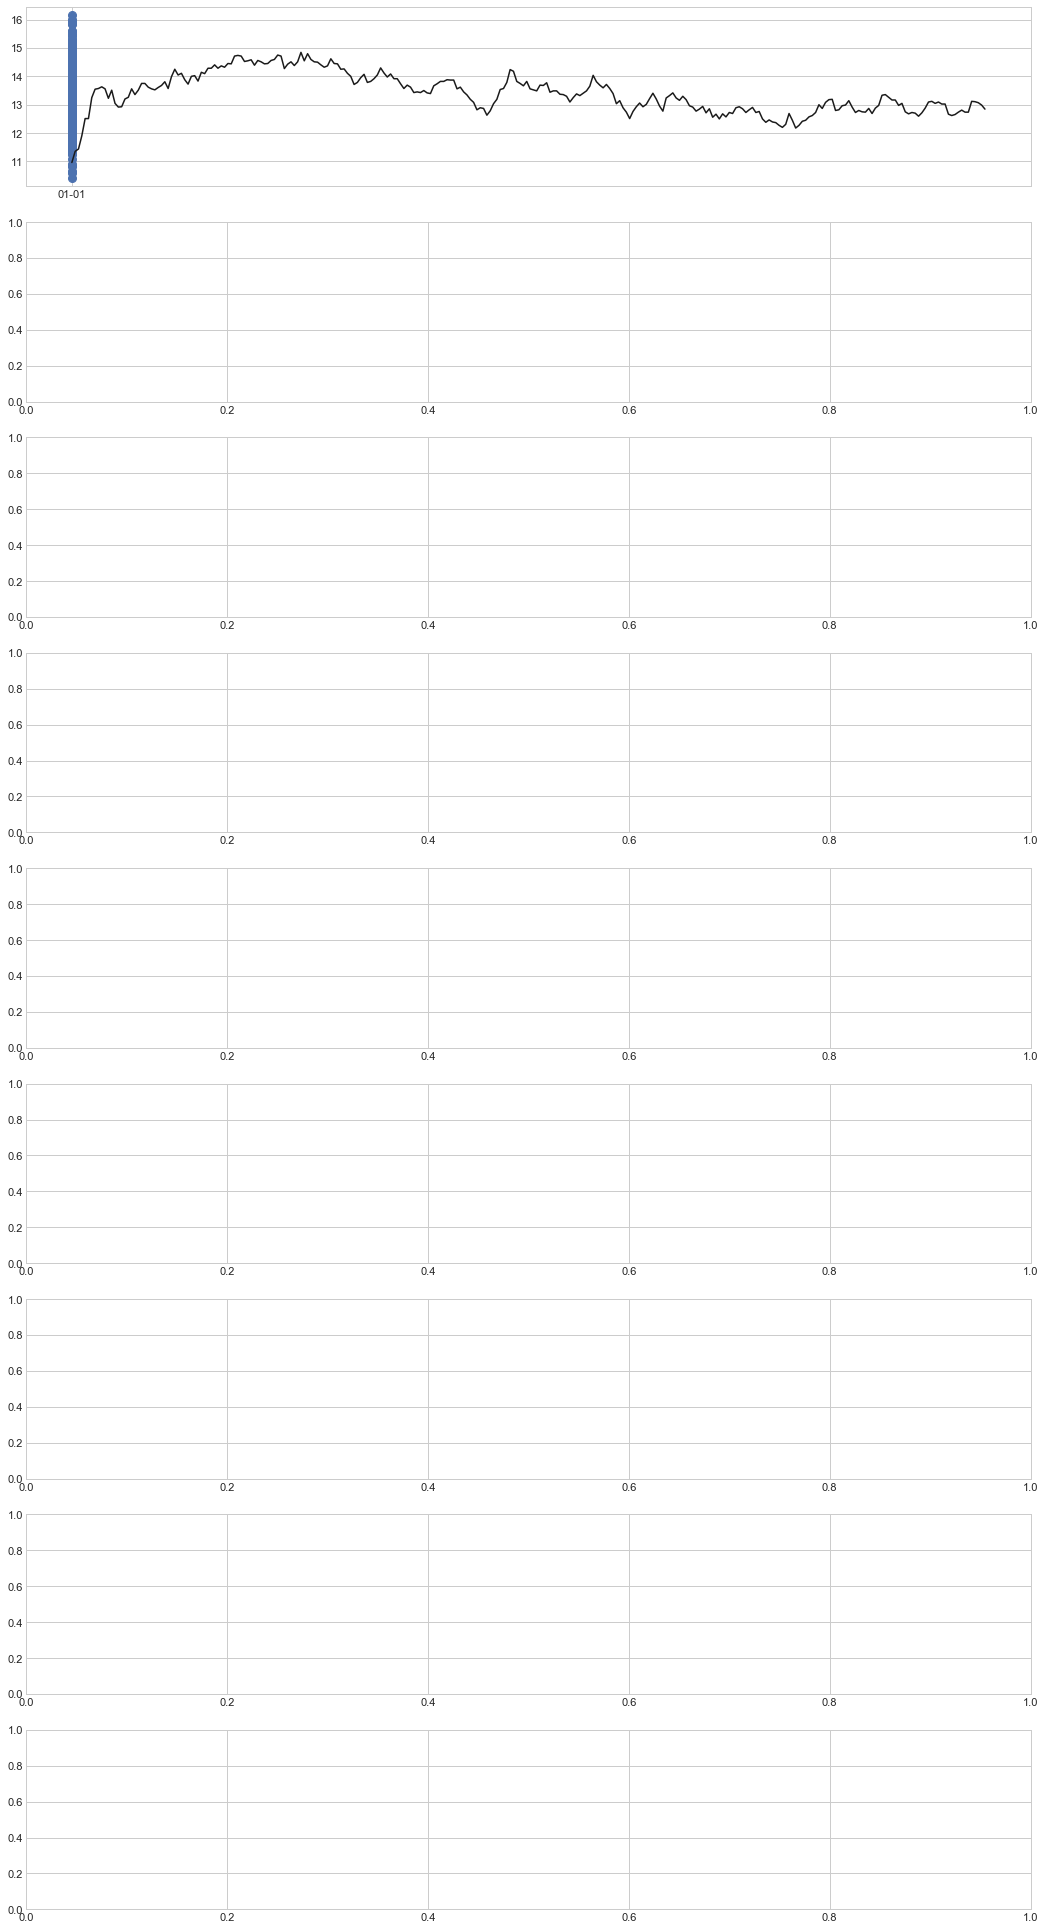

In [14]:
# Plot timeseries to look for trends  > Improvement: Turn the subplots into a function

from scipy.ndimage.filters import uniform_filter1d

fig, ax = plt.subplots(9,figsize=(18,35))

#plotStartDate=dt.date(2022,4,28);
#dayNum=pd.Timedelta(endDate-plotStartDate).days;
#SleepDaily=SleepDaily[-dayNum:]

datelabels=pd.date_range(startDate, endDate).strftime("%m-%d");
#datelabels=pd.date_range(plotStartDate, endDate).strftime("%m-%d");
datelabels=datelabels[::7]

day=np.arange(0, SleepDaily.shape[0])

SleepRunAvg=uniform_filter1d(SleepDaily['duration'], 7,mode='nearest')     

curve1a, = ax[0].plot(SleepDaily['duration'],'o--',markersize=8,label='Oliver Data');
curve1b, = ax[0].plot(day,SleepRunAvg,color='k',label='7 day window average');

index3mo=np.where(SleepDaily.index=='04-25')[0][0];
curve1c = ax[0].axhline(y=14, xmin = 0, xmax = index3mo/day[-1],color='r',label='Recommend min') #c="red",linewidth=1)
curve1d = ax[0].axhline(y=12, xmin = index3mo/day[-1], xmax = day[-1],color='r') #c="red",linewidth=1)

ax[0].set(xlabel='Date',ylabel='Total sleep duration');
ax[0].set_xticks(np.arange(0, numdays,7)); 
ax[0].set_xticklabels(datelabels, fontsize=12,rotation = 45);
ax[0].set_yticks(np.arange(10, 17,.5));
ax[0].legend(loc='lower center');

SleepRunAvg=uniform_filter1d(SleepDaily['longest sleep'], 7,mode='nearest')   

curve2a, = ax[1].plot(SleepDaily['longest sleep'],'o--',markersize=8, label='Oliver Data')
curve2b, = ax[1].plot(day,SleepRunAvg,color='k',label='7 day window average')

ax[1].set(ylabel='Longest sleep session');
ax[1].set_xticks(np.arange(0, numdays,7)); 
ax[1].set_xticklabels(datelabels, fontsize=12,rotation = 45);
ax[1].set_yticks(np.arange(2.5, 12,.5));
#ax[1].legend(loc='upper left');

SleepRunAvg=uniform_filter1d(SleepDaily['longest sleep hour'], 7,mode='nearest') 

curve7a, = ax[2].plot(SleepDaily['longest sleep hour'],'o--',markersize=8, label='Oliver Data')
curve7b, = ax[2].plot(day,SleepRunAvg,color='k',label='7 day window average')
curve7c = ax[2].axhline(y=20, xmin = 0, xmax = 1,color='r',label='Target') #c="red",linewidth=1)

ax[2].set(ylabel='Bedtime');
ax[2].set_xticks(np.arange(0, numdays,7)); 
ax[2].set_xticklabels(datelabels, fontsize=12,rotation = 45);
ax[2].set_yticks(np.arange(17, 22,.5));
ax[2].set_ylim([17, 22])
#ax[2].set_yticklabels(['12p','1','2','3','4','5','6','7','8','9','10'], fontsize=12);
ax[2].set_yticklabels(['5:00','5:30','6:00','6:30','7:00','7:30','8:00','8:30','9:00','9:30','10:00'], fontsize=12);
ax[4].legend(loc='lower center');

SleepRunAvg=uniform_filter1d(SleepDaily['longest wake'], 7,mode='nearest') 

curve5a, = ax[3].plot(SleepDaily['longest wake'],'o--',markersize=8, label='Oliver Data')
curve5b, = ax[3].plot(day,SleepRunAvg,color='k',label='7 day window average')

ax[3].set(ylabel='Longest wake window');
ax[3].set_xticks(np.arange(0, numdays,7)); 
ax[3].set_xticklabels(datelabels, fontsize=12,rotation = 45);
ax[3].set_yticks(np.arange(0, 6,.5));
ax[3].set_ylim([1, 5])
#ax[3].legend(loc='upper center');

SleepRunAvg=uniform_filter1d(SleepDaily['average day wake'], 7,mode='nearest') 

curve8a, = ax[4].plot(SleepDaily['average day wake'],'o--',markersize=8, label='Oliver Data')
curve8b, = ax[4].plot(day,SleepRunAvg,color='k',label='7 day window average')
curve8c = ax[4].axhline(y=1.5, xmin = 0, xmax = index3mo/day[-1],color='r',label='Recommend max') #c="red",linewidth=1)
curve8d = ax[4].axhline(y=2, xmin = index3mo/day[-1], xmax = day[-1],color='r') #c="red",linewidth=1)

ax[4].set(ylabel='Average daytime wake window');
ax[4].set_xticks(np.arange(0, numdays,7)); 
ax[4].set_xticklabels(datelabels, fontsize=12,rotation = 45);
ax[4].set_yticks(np.arange(.5, 3,.5));
ax[4].legend(loc='upper center');

SleepRunAvg=uniform_filter1d(SleepDaily['average day nap'], 7,mode='nearest') 

curve8a, = ax[5].plot(SleepDaily['average day nap'],'o--',markersize=8, label='Oliver Data')
curve8b, = ax[5].plot(day,SleepRunAvg,color='k',label='7 day window average')
#curve8c = ax[5].axhline(y=2, xmin = 0, xmax = index3mo/day[-1],color='r',label='Recommend max') #c="red",linewidth=1)

ax[5].set(ylabel='Average daytime nap length');
ax[5].set_xticks(np.arange(0, numdays,7)); 
ax[5].set_xticklabels(datelabels, fontsize=12,rotation = 45);
ax[5].set_yticks(np.arange(.25, 2.5,.25));

SleepRunAvg=uniform_filter1d(SleepDaily['day naps'].astype('float'), 7,mode='nearest') 

curve3a, = ax[6].plot(SleepDaily['day naps'],'o--',markersize=8);
curve3b, = ax[6].plot(day,SleepRunAvg,color='k',label='7 day window average')

ax[6].set(ylabel='Number of day naps');
ax[6].set_xticks(np.arange(0, numdays,7)); 
ax[6].set_xticklabels(datelabels, fontsize=12,rotation = 45);
ax[6].set_yticks(np.arange(2,10));

SleepRunAvg=uniform_filter1d(SleepDaily['night wakes'].astype('float'), 7,mode='nearest') 

curve4a, = ax[7].plot(SleepDaily['night wakes'],'o--',markersize=8,label='Oliver Data');
curve4b, = ax[7].plot(day,SleepRunAvg,color='k',label='7 day window average')

ax[7].set(ylabel='Number of night awakenings');
ax[7].set_xticks(np.arange(0, numdays,7)); 
ax[7].set_xticklabels(datelabels, fontsize=12,rotation = 45);
ax[7].set_yticks(np.arange(1, 7));

SleepRunAvg=uniform_filter1d(SleepDaily['longest wake hour'], 7,mode='nearest') 

curve6a, = ax[8].plot(SleepDaily['longest wake hour'],'o--',markersize=8, label='Oliver Data')
curve6b, = ax[8].plot(day,SleepRunAvg,color='k',label='7 day window average')

ax[8].set(ylabel='Longest awake time of day');
ax[8].set_xticks(np.arange(0, numdays,7)); 
ax[8].set_xticklabels(datelabels, fontsize=12,rotation = 45);
ax[8].set_yticks(np.arange(9, 19));
ax[8].set_ylim([9, 19])
ax[8].set_yticklabels(['9','10','11','12p','1','2','3','4','5','6','7'], fontsize=12);

Fig_name= 'Oliver_SleepTrends_'+ startDate.strftime("%m-%d-%y")+ '_to_' + endDate.strftime("%m-%d-%y");
fig.savefig(Fig_name)

In [ ]:
# Scratch pad for figuring out new daily calculations 

plotDate=dt.date(2022,5,11);
dayNum=pd.Timedelta(plotDate-startDate).days;

i=dayNum;

#find longest wake period
testS=format(dailySleepP[i,dailyDayind:-1].astype('int8')) #convert to string of integers (to use strip/split func)
testS=testS[1:-1].replace(" ","").replace("\n","") #remove all formating in string
wakes=testS.strip('1').split('1');
wakes=[ele for ele in wakes if ele != ''];
maxW=max(wakes); #separate out all the wake periods (sleepP=0) and find max
print('longest wake=',len(maxW)*res/60)
    
LongestWake.append(len(maxW)*res/60);
LongestWakeHour.append((testS.find(maxW)+dailyDayind)*res/60);

#find bedtime
dailyBedtimeMin=int(indexMax/24*(12+4)); 
dailyBedtimeMax=int(indexMax/24*(12+11));
testS=format(dailySleepP[i,dailyBedtimeMin:dailyBedtimeMax].astype('int8')) #convert to string of integers (to use strip/split func)
testS=testS[1:-1].replace(" ","").replace("\n","") #remove all formating in string
sleeps=testS.strip('0').split('0');
sleeps=[ele for ele in sleeps if ele != ''];
sleepLengths = [len(ele) for ele in sleeps]; #new
wakes=testS.split('1');
wakes=[ele for ele in wakes if ele != ''];
wakeLengths = [len(ele) for ele in wakes]; #new
maxS=max(sleeps)
if testS[-1]=='1':
    print('last is sleep')
else:
    print('last is not sleep')
    

#separate out all the sleep periods (sleepP=1) and find max
    #if len(wakes[-1])<=6 and len(maxS)==len(sleeps[-1]):
        #print('maxS=', len(maxS))
        #print('last sleep=',len(sleeps[-1]))
     #   print(SleepDaily.index[i])
     #   print(testS.find(sleeps[-2]))
     #   if testS.find(sleeps[-2])>int(indexMax/24*17): 
     #       maxS=sleeps[-2];
            
        #print(testS.find(maxS))
    
    #LongestSleepHour.append((testS.find(maxS)+dailyDayind)*res/60);
LongestSleepHour.append((testS.find(maxS)+dailyBedtimeMin)*res/60);
    
    # Bedtime logic still has some errors, 4/20 & 3/13 too early, 5/24 was fixed by moving night end to 11pm
    
#find day naps and wake windows    
testS=format(dailySleepP[i,dailyDayind:dailyNightind].astype('int8')) #convert to string of integers (to use strip/split func)
testS=testS[1:-1].replace(" ","").replace("\n","") #remove all formating in string
if testS[0]=='0':
    testS=testS.lstrip('0')
if testS[0]=='1':
    testS=testS.lstrip('1')
if testS[-1]=='0':
    testS=testS.rstrip('0')
if testS[-1]=='1':
    testS=testS.rstrip('1')
dayNaps=testS.split('0');
dayNaps = [ele for ele in dayNaps if ele != '']; # remove all the empty elements
dayNapLengths = [len(ele) for ele in dayNaps]  
dayWakes=testS.split('1');
dayWakes = [ele for ele in dayWakes if ele != '']; # remove all the empty elements
maxW2=max(dayWakes);

print('longest wake2=',len(maxW2)*res/60)

dayWakeLengths = [len(ele) for ele in dayWakes]
dayWakeisnightWake=0;
if dayWakeLengths[0]<=6:
    del dayWakeLengths[0]
    del dayNapLengths[0]
    dayWakeisnightWake=1;
#AverageDayNap.append(np.mean(dayNapLengths)*res/60); 
#AverageDayWake.append(np.mean(dayWakeLengths)*res/60);
#DayNapCount.append(len(dayNaps))

    
#LongestWake.append(len(maxW)*res/60);
#LongestWakeHour.append((testS.find(maxW)+dailyDayind)*res/60);



#find night wake periods
testS=format(dailySleepP[i,dailyNightind:-1].astype('int8'))
testS+=format(dailySleepP[i+1,0:dailyDayind].astype('int8'))
testS=testS.replace(" ","").replace("\n","").replace("]","").replace("[","")  
nightWakes=testS.split('1');
nightWakes = [ele for ele in nightWakes if ele != ''];
#NightWakeCount.append(len(nightWakes)+dayWakeisnightWake)

print('sleep lengths:',sleepLengths)
print('wake lengths:',wakeLengths)
print('day wake lengths:',dayWakeLengths)
print('day nap lengths:',dayNapLengths)

5/13 - could be earlier bedtime

In [ ]:
wakes

In [738]:
testS.find(maxS)

15

In [739]:
sleeps

['1111111', '11111111111111111111111111111', '111111111']

In [545]:
SleepDaily['test']=SleepDaily['night wakes']-SleepDaily['night wakes v0'];
SleepDaily[['night wakes','night wakes v0','test']][SleepDaily['test']!=0]

KeyError: 'night wakes v0'

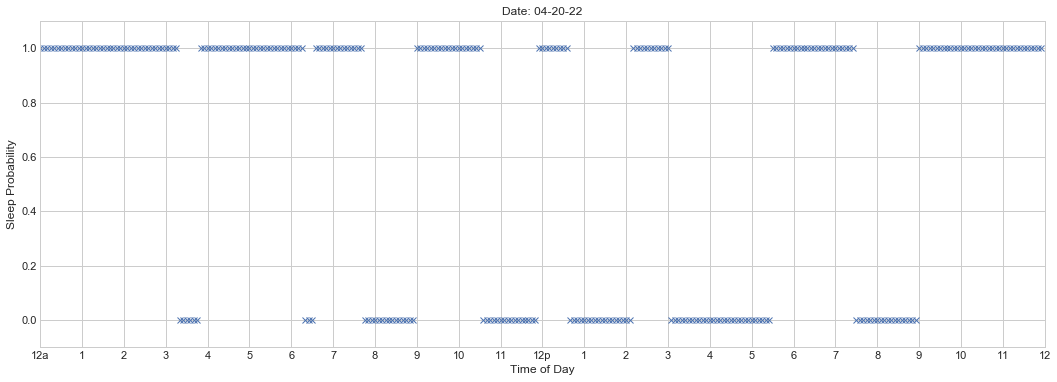

In [590]:
# This can used to visualize each individual vector by date (optional)

plt.figure(figsize=(18,6))
plt.style.use('seaborn-whitegrid')

plotDate=dt.date(2022,4,20)
dayNum=pd.Timedelta(plotDate-startDate).days

#plt.plot(dayvec)
plt.plot(dailySleepP[dayNum,],'x')
plt.xlabel('Time of Day')
plt.ylabel('Sleep Probability')

timeticks=np.arange(0, indexMax+1, step=int(indexMax/24));
timelabels=['12a','1','2','3','4','5','6','7','8','9','10','11','12p','1','2','3','4','5','6','7','8','9','10','11','12']
plt.xticks(timeticks,timelabels);  # Set label locations.
plt.axis([0, indexMax,-.1,1.1]);

#plotDate=startDate+pd.Timedelta(dayNum,'d')
plt.title('Date: '+ plotDate.strftime("%m-%d-%y"));

In [454]:
SleepDaily['test']=SleepDaily['day naps']-SleepDaily['day naps v0'];
SleepDaily[['day naps','day naps v0','test']][SleepDaily['test']!=0]

,day naps,day naps v0,test
01-30,2,3,-1
02-19,4,5,-1
02-22,5,6,-1
02-26,3,4,-1
03-05,5,6,-1
03-06,5,6,-1
03-14,9,10,-1
03-16,4,5,-1
03-18,5,6,-1
03-19,4,5,-1


In [659]:
#%magic

dtype('float64')

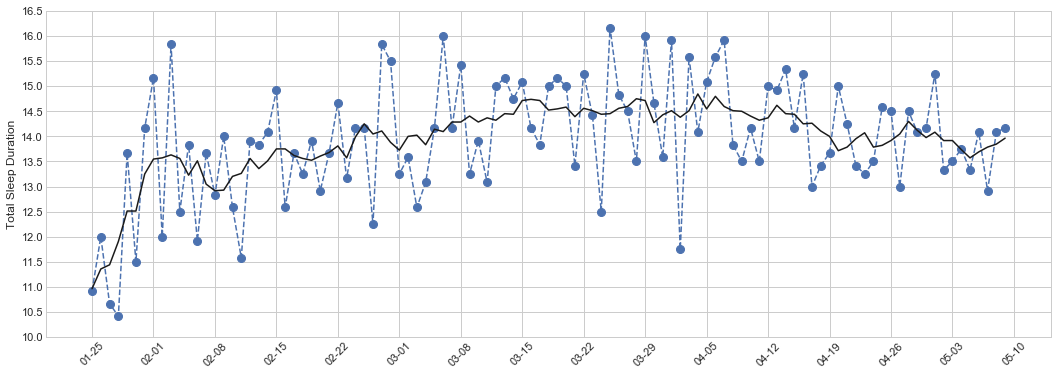

In [675]:
plt.figure(figsize=(18,6))


   
SleepDurationRunAvg=uniform_filter1d(SleepDaily['duration'], 7,mode='nearest')     

startDate=dt.date(2022,1,25)
numdays=pd.Timedelta(endDate-startDate).days+1

datelabels=pd.date_range(startDate, endDate).strftime("%m-%d");
datelabels=datelabels[::7]

plt.xticks(np.arange(0, numdays,7),datelabels);

plt.plot(SleepDaily.index,SleepDaily['duration'],'o--',markersize=8);
plt.plot(day,SleepDurationRunAvg,color='k')



plt.ylabel('Total Sleep Duration')
plt.xticks(rotation = 45);
plt.yticks(np.arange(10, 17,.5));

In [677]:
print(len(day))
print(numdays/7)
print(len(np.arange(0, numdays,7)))
print(len(SleepDaily['duration']))

105
15.571428571428571
16
105


In [676]:
SleepDaily.index

Index(['01-29', '01-30', '01-31', '02-01', '02-02', '02-03', '02-04', '02-05',
       '02-06', '02-07',
       ...
       '05-04', '05-05', '05-06', '05-07', '05-08', '05-09', '05-10', '05-11',
       '05-12', '05-13'],
      dtype='object', length=105)

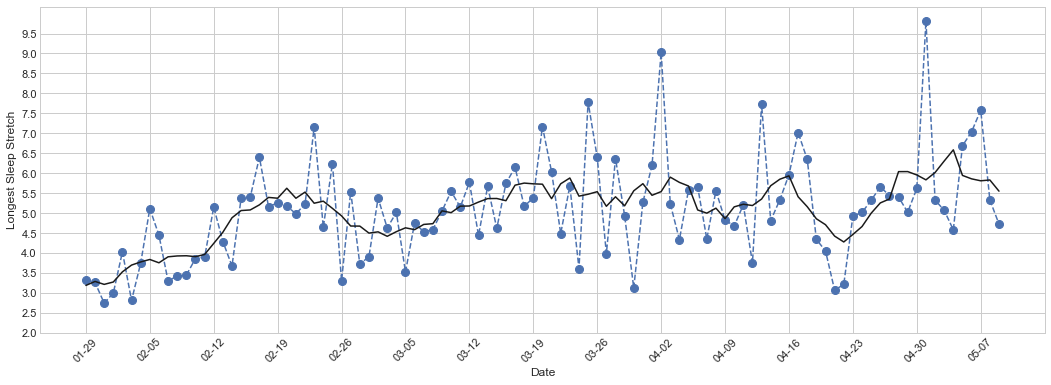

In [422]:
# Plotting scratch pad



#plt.yticks(np.arange(0, numdays+1),datelabels);

#datelabels2=pd.date_range(startDate, endDate+pd.Timedelta(1,'d'),(numdays)/7).strftime("%m-%d");

#datelabels.shape

#datelabels=pd.date_range(startDate, endDate+pd.Timedelta(1,'d')).strftime("%m-%d");
#plt.yticks(np.arange(0, numdays+1),datelabels);

#plt.bar(Sleepbyday['datetime'],Sleepbyday['duration'])
#day=np.linspace(1, 10, num=10)

day=np.arange(0, SleepDaily.shape[0])

#SleepDurationRunAvg=np.convolve(Sleepbyday['duration'], np.ones(7)/7, mode='valid');
    
from scipy.ndimage.filters import uniform_filter1d

#SleepDurationRunAvg=uniform_filter1d(SleepDaily['duration'], 7,mode='nearest')    
SleepDurationRunAvg=uniform_filter1d(SleepDaily['longest'], 7,mode='nearest')     
    
#1 to Sleepbyday['datetime'].shape
plt.figure(figsize=(18,6))
#plt.bar(day,SleepDaily['duration'])

#plt.bar(day,SleepDaily['longest'])
#plt.bar(SleepDaily['datetime'],SleepDaily['longest'])
plt.plot(SleepDaily['longest'],'o--',markersize=8)

#hourly_ticks = 4 * 60 * 60 * np.arange(6)
#by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

plt.plot(day,SleepDurationRunAvg,color='k')

# Label the axes
#plt.xlabel('Day Number')
plt.xlabel('Date')

#datelabels=pd.date_range(startDate, endDate,(numdays)/7).strftime("%m-%d");
plt.xticks(np.arange(0, numdays,7),datelabels);

#plt.ylabel('Total Sleep Duration')
plt.ylabel('Longest Sleep Stretch')
plt.xticks(rotation = 45)
plt.yticks(np.arange(2, 10,.5));
#plt.axis([0, 90,10,16])
#plt.ylim((0,10))


#datelabels=pd.date_range(startDate, endDate).strftime("%m-%d");


#label the figure
#plt.title(hist_country)

# to make more honest, start they y axis at 0
#plt.axis([1959, 2011,0,25])

#plt.axis([0, Sleepbyday.shape[0]+1-7,10,16])
#plt.axis([0, 90,10,16])
#plt.yaxis([0, 10])
#plt.ylim((0,10))

#plt.grid(color='r', axis='y',linestyle='--', linewidth=1)
mpl.rcParams.update({'font.size': 32})
plt.show()

In [23]:
# Scratch pad on datetime conversions

dob=dt.datetime(2022,1,25,20,22)
dob_millis=int(dt.datetime.timestamp(dob)*1000)

# Something like the below (didn't work)
# sql_query4="REPLACE INTO babies (birthday) VALUES dob_millis"
# cursor.execute(sql_query4)

#Babydata['datetime']=pd.to_datetime(Babydata['start_millis'],unit='ms')
#Babydata['datetime']=pd.to_datetime(Babydata['start_millis'],unit='ms',utc=True) #This is in UTC time 
#Babydata['datetime']=pd.Timestamp(Babydata['start_millis'],unit='ms', tz='US/Pacific')

#from dateutil import tz
#dst = tz.gettz('America/Creston')
#print(dst)

#Babydata['datetime']=pd.datetime(Babydata['start_millis'],unit='ms',tzinfo=dst,utc=True); 
#Babydata['datetime']=Babydata['datetime'].dt.to_pydatetime();#Babydata['start_millis'],unit='ms',tzinfo=dst,utc=True);

#range(Babydata.shape[0])
#for i in range(Babydata.shape[0]):
#    Babydata['datetime_tz'][i]=Babydata['datetime'][i].replace(tzinfo=dst);#.replace(tzinfo=dst)


        #date=Sleepdata['datetime_tz'][i].date();
        #date=Sleepdata['datetime'][i].replace(tzinfo=dst).date();
        #date=Sleepdata['datetime'][i].dt.tz_localize
        #daytime=Sleepdata['datetime_tz'][i]-dt.datetime.combine(date, dt.timetz(0,0,));
        #daytime=Sleepdata['datetime'][i].replace(tzinfo=dst)-dt.datetime.combine(date, dt.time(0,0)).replace(tzinfo=dst);
        #daytime=Sleepdata['datetime'][i].dt.tz_localize-dt.datetime.combine(date, dt.time(0,0));
        
#Babydata['datetime_tz']=Babydata['datetime'];

#for items in Babydata['datetime'].iteritems():
    #print(items)
    #print(type(items))
    
#Babydata['datetime'][0]=Babydata['datetime'][0].replace(tzinfo=dst)

#Babydata['datetime'][0].dt.tz_localize

In [157]:
import numpy as np

In [163]:
np.power(10,40*np.log10(300/250))*203/40

7459.090707443109

In [162]:
10^2

8

In [156]:
import numpy as np
np.log10(100)

NameError: name 'log10' is not defined

In [249]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4))
print(ser)

0    6
1    3
2    7
3    4
dtype: int64


In [250]:
np.exp(ser)

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

In [254]:
np.exp(1)

2.718281828459045

In [253]:
np.exp?